In [1]:
%matplotlib inline
# non-specific libraies
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils as utils
from keras import backend as K

Using TensorFlow backend.


# Load Dataset
---
- ### Dataset operations
    - data normalization
    - data reshaping
    - label gethering

In [2]:
# pre-defined mnist dataest
from keras.datasets import mnist

batch_size = 128
n_classes = 10 # 10 digits 0 to 9


# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# input image dimentions
n_sample, img_rows, img_cols = x_train.shape

# Reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], -1)
input_shape = (img_rows * img_cols,)

# float limiting for optimized memmory (for GPU usage) 
# basic gaming GPUs only works with 32 bit float and 32 bit int
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# normalizing the input between [1 0]
x_train /= 255
x_test /= 255
print('x max:{} x min {}'.format(x_train.max(), x_train.min()))
print('train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("label: {} ,One hot encoding: {}".format(y_train[0], Y_train[0, :]))

x max:1.0 x min 0.0
train shape: (60000, 784)
60000 train samples
10000 test samples
label: 5 ,One hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Mnist data example

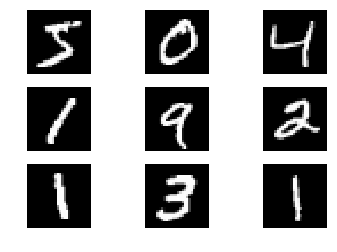

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(img_rows, img_cols), cmap='gray')
    plt.axis("off")

# Model Definition

In [4]:
# needed for model definition
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation

In [5]:
model = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Train

In [6]:
LR = 1e-3
opt = keras.optimizers.Adam(lr=LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
model.summary()
utils.plot_model(model, to_file='images/linear_model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
__________

### Printed model graph
-----
![model graph](images/linear_model.png)

In [7]:
n_epoch = 3 # we can increase epoch
history = model.fit(x_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.2, shuffle=True)
score = model.evaluate(x_test, Y_test, verbose=1)
print ('Test score   : {:.6f}'.format(score[0]))
print ('Test accuracy: {:5.2f}%'.format(score[1] * 100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 22s 457us/step - loss: 1.5917 - acc: 0.4240 - val_loss: 0.6878 - val_acc: 0.8082
Epoch 2/3
48000/48000 [==============================] - 20s 425us/step - loss: 0.7828 - acc: 0.7532 - val_loss: 0.3499 - val_acc: 0.9218
Epoch 3/3
10000/10000 [==============================] - 6s 597us/step
Test score   : 0.271645
Test accuracy: 94.25%


## Training History Visiualization

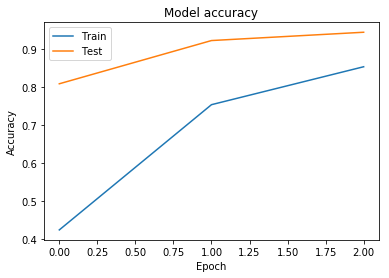

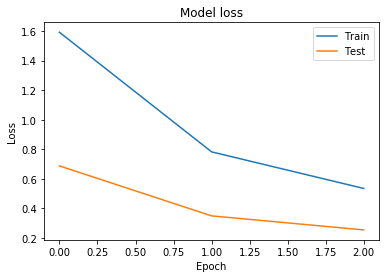

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## saving and loading weights

In [9]:
model.save_weights('weights/mnist_linear.h5')
print('model saved.')

model saved.


In [10]:
model.load_weights('weights/mnist_linear.h5')
score = model.evaluate(x_test, Y_test, verbose=1)
print ('Test score   : {:.6f}'.format(score[0]))
print ('Test accuracy: {:5.2f}%'.format(score[1] * 100))

10000/10000 [==============================] - 6s 608us/step
Test score   : 0.271645
Test accuracy: 94.25%


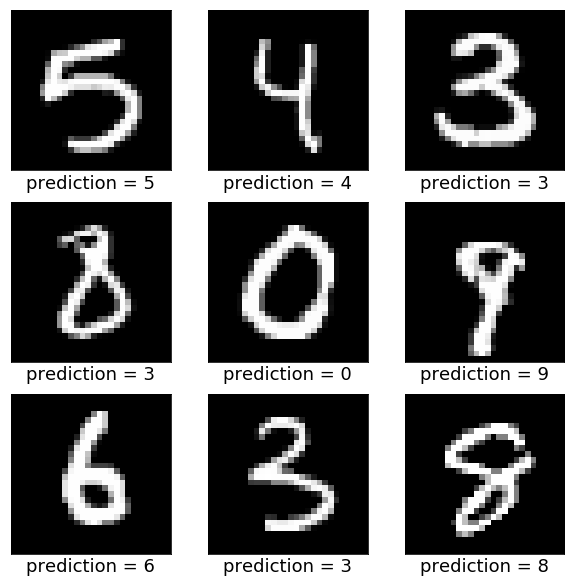

In [11]:
## Visualize sample result
radn_n = np.random.randint(x_test.shape[0] - 9)
res = model.predict_classes(x_test[radn_n:radn_n+9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i+radn_n].reshape(img_rows, img_cols), 'gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel("prediction = %d" % res[i], fontsize= 18)

In [8]:
model = Sequential([
    #Dense(128, input_shape=input_shape, activation='relu', kernel_regularizer=keras.regularizers.l2(0.2)),
    #Dropout(0.5),
    Dense(n_classes, input_shape=input_shape, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.2))
])

# Train

In [9]:
LR = 1e-3
opt = keras.optimizers.Adam(lr=LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
model.summary()
utils.plot_model(model, to_file='images/linear_model_2.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Printed model graph
-----
![model graph](images/linear_model_2.png)

In [10]:
n_epoch = 4 # we can increase epoch
history = model.fit(x_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.2, shuffle=True)
score = model.evaluate(x_test, Y_test, verbose=1)
print ('Test score   : {:.6f}'.format(score[0]))
print ('Test accuracy: {:5.2f}%'.format(score[1] * 100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 8s 160us/step - loss: 1.9704 - acc: 0.7662 - val_loss: 1.5834 - val_acc: 0.8380
Epoch 2/4
48000/48000 [==============================] - 7s 144us/step - loss: 1.6112 - acc: 0.8107 - val_loss: 1.5814 - val_acc: 0.8337
Epoch 3/4
48000/48000 [==============================] - 7s 140us/step - loss: 1.6078 - acc: 0.8128 - val_loss: 1.5790 - val_acc: 0.8340
Epoch 4/4
10000/10000 [==============================] - 2s 200us/step
Test score   : 1.580997
Test accuracy: 82.02%


In [11]:
model.save_weights('weights/mnist_linear_2.h5')
print('model saved.')

model saved.


## References
----
- [__Keras__][1]
- [The MNITS Database of handwritten digits][2]

[1]: https://keras.io/
[2]: http://yann.lecun.com/exdb/mnist/